# Setting up drive enviournment

In [ ]:
#from google.colab import files
#uploaded = files.upload()
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd /content/drive/My\ Drive/Akshay experiments on SOM

/content/drive/My Drive/Akshay experiments on SOM


In [ ]:
import os
os.listdir()

['great-data.csv',
 'projected_som.pkl',
 'som_20x20_1000.csv',
 'small_data.npy',
 'nodesFeature_0.png',
 'nodesDifference.png',
 'Features',
 'projected_som_10k.pkl',
 'som_20x20_10000.csv',
 'som_word2vec',
 'projected_som_word2vec.pkl',
 'Copy of SOM_word2vec',
 'val_embed_bert.pickle',
 'test_embed_bert.pickle',
 'train_embed_bert.pickle',
 'som_bert',
 'som_20_20_word2vec200.csv',
 'word2vec_20x20_200.npy',
 'word2vec_20x20.npy',
 'projected_bert.pkl',
 'som_20_20_bert.csv',
 'projection_difference.png']

Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Loading the dataset

In [ ]:
DATASET_COLUMNS = ["target", "text"]
DATASET_ENCODING = "ISO-8859-1"
data = pd.read_csv('great-data.csv', encoding =DATASET_ENCODING , names=DATASET_COLUMNS, header = 'infer')

# Exploring the dataset size

In [ ]:
print("Dataset size:", len(data))

Dataset size: 50001


In [ ]:
data = data[1:]

In [ ]:
data.head()

,target,text
1,4,@indykitty *hug indykitty* sleep tight indy...
2,0,@Shough yeah I feel really bad for them tryin...
3,0,@embeep sorry about your sadness I'll be home...
4,0,Couldn't spend time with the family cuz of wor...
5,4,is new on twitter


Mapping target label to String
<br> 0 -> NEGATIVE
<br> 2 -> NEUTRAL
<br> 4 -> POSITIVE

In [ ]:
decode_map = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"}
def decode_sentiment(label):
    return decode_map[int(label)]

In [ ]:
# applying the function described as above
data.target = data.target.apply(lambda x: decode_sentiment(x))

 lets look at target column now

In [ ]:
data.target

1        POSITIVE
2        NEGATIVE
3        NEGATIVE
4        NEGATIVE
5        POSITIVE
           ...   
49996    NEGATIVE
49997    POSITIVE
49998    POSITIVE
49999    NEGATIVE
50000    NEGATIVE
Name: target, Length: 50000, dtype: object

In [ ]:
from collections import Counter
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
target_cnt = Counter(data.target)

Text(0, 0.5, 'Number of examples')

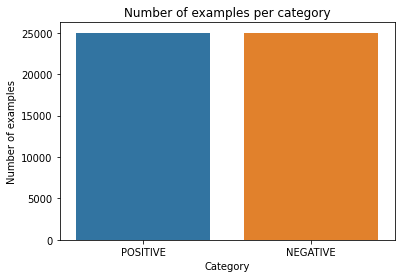

In [ ]:
ax = sns.barplot(x=list(target_cnt.keys()),y=list(target_cnt.values()))
ax.set_title('Number of examples per category')
ax.set_xlabel("Category")
ax.set_ylabel("Number of examples")

# Data cleaning

Importing the libraries for data cleaning


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

Data cleaning


In [ ]:
# downloading stopwords for nltk in collab
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#looking at first few texts in data
data['text'].head()

1      @indykitty *hug indykitty* sleep tight indy... 
2    @Shough yeah I feel really bad for them  tryin...
3    @embeep sorry about your sadness  I'll be home...
4    Couldn't spend time with the family cuz of wor...
5                                   is new on twitter 
Name: text, dtype: object

Lets look at stop_words that we are going to remove

In [ ]:
stop_words = stopwords.words("english")

In [ ]:
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

lets look at the stemmer that we are going to use

In [ ]:
stemmer = SnowballStemmer("english")

In [ ]:
stop = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 
        'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 
        'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 
        'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 
        'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 
        'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
        'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such',  'only', 'own', 'same', 
        'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just',  'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y']
removed = ['no', 'nor', 'not','don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 
'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 
'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

Lol! its calss object of nttk.stem.snowball as we defined

In [ ]:
# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

# Meaning of expression
# @ = @
# \S+ = (not whitespace) one or more
# | = or
# https = https once or none
# ?: = non capture group
# \S = (not whitespace) one or more
# | = or
# http = https once or more
# ?: = non capture group
# \S =  (not whitespace) one or more
# | = or
# [^A-Za-z0-9] : anything


stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

def preprocess(text, stem=False):
    # stemmer is not used as stem is kept as false
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [ ]:
data.text = data.text.apply(lambda x: preprocess(x))

In [ ]:
data.head()

,target,text
1,POSITIVE,hug indykitty sleep tight indy
2,NEGATIVE,yeah feel really bad trying best help don know...
3,NEGATIVE,sorry sadness home next weeked faff stalk cele...
4,NEGATIVE,couldn spend time family cuz work went beach w...
5,POSITIVE,new twitter


# Splitting the dataset into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)
print("TRAIN size:", len(data_train))
print("TEST size:", len(data_test))

TRAIN size: 40000
TEST size: 10000


# Making a list of list of words in sentence

In [ ]:
%%time
documents = [_text.split() for _text in data_train.text]

CPU times: user 112 ms, sys: 11 ms, total: 123 ms
Wall time: 126 ms


In [ ]:
# lets look at first five element
documents[0:5]

[['man',
  'gotta',
  'get',
  'pretty',
  'fro',
  'work',
  'tonight',
  'sigh',
  'dont',
  'want',
  'come',
  'visit',
  'tonight',
  'luxe',
  'lounge'],
 ['g',
  'night',
  'everyone',
  'going',
  'bed',
  'xoxo',
  'no',
  'school',
  'tmrw',
  'holiday'],
 ['rip',
  'whataburger',
  'last',
  'triple',
  'meat',
  'triple',
  'cheese',
  'bacon',
  'miss'],
 ['followfriday', 'justinfrench', 'welcome'],
 ['talking', 'phone']]

# Lets make word2vec model from genism

In [ ]:
# Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM,Bidirectional
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools



# WORD2VEC model definition
<br> W2V_SIZE = 300 i.e we would be using 300 feature representation of words
<br> W2V_WINDOW = 7 i.e. Maximum distance between the current and predicted word within a sentence. (window in model definition)
<br> W2V_EPOCH = 32 ; would be used at the time of trianing
<br> W2V_MIN_COUNT = 10 :  Ignores all words with total frequency lower than this.(min_count in model definition)
<br> workers = 8; faster training with multicore machines


In [ ]:
w2v_model = gensim.models.word2vec.Word2Vec(size=300, 
                                            window=7, 
                                            min_count=10, 
                                            workers=8)

# training w2v_model

### Lets first build a vocabulary

In [ ]:
try:
  w2v_model.build_vocab(documents)
except:
  pass

In [ ]:
len(w2v_model.wv.vocab)

3354

### Lets train the model

In [ ]:
%%time
w2v_model.train(documents, total_examples=len(documents), epochs=32)

CPU times: user 31.7 s, sys: 241 ms, total: 31.9 s
Wall time: 17.1 s


(6950015, 9458528)

# lets look at a few similar words

In [ ]:
w2v_model.most_similar("love")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('including', 0.46429798007011414),
 ('bands', 0.4233565330505371),
 ('luv', 0.4059488773345947),
 ('sings', 0.39904695749282837),
 ('model', 0.3956802487373352),
 ('demi', 0.3933035135269165),
 ('wheres', 0.3920254409313202),
 ('brazil', 0.38922587037086487),
 ('singing', 0.3865150213241577),
 ('loves', 0.3814723491668701)]

In [ ]:
w2v_model.most_similar("hate")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('trust', 0.38658279180526733),
 ('blah', 0.38056275248527527),
 ('mondays', 0.37763258814811707),
 ('dentist', 0.36581337451934814),
 ('kills', 0.36452096700668335),
 ('thunder', 0.3629508912563324),
 ('tryna', 0.355926513671875),
 ('gosh', 0.3522855043411255),
 ('become', 0.34842389822006226),
 ('grr', 0.3447277545928955)]

In [ ]:
w2v_model.most_similar("cat")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('dog', 0.5921163558959961),
 ('purple', 0.5656636953353882),
 ('kitty', 0.5454989671707153),
 ('pig', 0.5278192758560181),
 ('mouse', 0.5033490657806396),
 ('allergic', 0.5013030171394348),
 ('tiny', 0.4950270652770996),
 ('cheese', 0.49360984563827515),
 ('attack', 0.492278516292572),
 ('bacon', 0.48947733640670776)]

In [ ]:
w2v_model.most_similar("amazon")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('available', 0.7340680360794067),
 ('price', 0.6993118524551392),
 ('apple', 0.6766443848609924),
 ('development', 0.6569369435310364),
 ('download', 0.6534490585327148),
 ('itunes', 0.652937114238739),
 ('contract', 0.6364863514900208),
 ('software', 0.6347399353981018),
 ('pre', 0.6329661011695862),
 ('pro', 0.6320502758026123)]

In [ ]:
w2v_model.most_similar("google")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('wave', 0.7509877681732178),
 ('chrome', 0.7470871210098267),
 ('latest', 0.6934822797775269),
 ('search', 0.6771820187568665),
 ('installed', 0.6738530397415161),
 ('engine', 0.6684616208076477),
 ('page', 0.6663774251937866),
 ('images', 0.6581977605819702),
 ('logo', 0.6470873355865479),
 ('files', 0.6456501483917236)]

In [ ]:
w2v_model.most_similar("boy")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('chicken', 0.49199599027633667),
 ('imma', 0.48773637413978577),
 ('nick', 0.48140954971313477),
 ('cousin', 0.4678303897380829),
 ('girl', 0.4650040864944458),
 ('selena', 0.4576827883720398),
 ('cruel', 0.4569093585014343),
 ('aunt', 0.4564822018146515),
 ('shes', 0.4505733847618103),
 ('brown', 0.44399094581604004)]

# Lets start on training a NN based on the word2vec vocab

## Tokenizing the sentences

In [ ]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_train.text)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 32828
CPU times: user 574 ms, sys: 8.63 ms, total: 582 ms
Wall time: 582 ms


## Preparing the dataset for feeding into neural network

In [ ]:
SEQUENCE_LENGTH = 140 
# KERAS
SEQUENCE_LENGTH = 140
EPOCHS = 8
BATCH_SIZE = 1024

### Padding sequences

In [ ]:
%%time
x_train = pad_sequences(tokenizer.texts_to_sequences(data_train.text), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(data_test.text), maxlen=SEQUENCE_LENGTH)

CPU times: user 786 ms, sys: 8.63 ms, total: 794 ms
Wall time: 800 ms


### Encoding the labels

In [ ]:
labels = data_train.target.unique().tolist()
labels.append("NEUTRAL")
labels

['NEGATIVE', 'POSITIVE', 'NEUTRAL']

In [ ]:
# we get labelEncoder from sklearn preprocessing ; it takes input as a list of categories and transforms them into classes 
encoder = LabelEncoder()
encoder.fit(data_train.target.tolist())

y_train = encoder.transform(data_train.target)
y_test = encoder.transform(data_test.target)

# reshaping to avoid 
# y_train shapes as (1280000,)
# y_test shapes as (320000,)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

KeyboardInterrupt: ignored

### lets look at shapes for training and test sets with labels

In [ ]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

In [ ]:
y_train[:10]

## Using trained Word2vec to define Embedding layer

### defining embedding matrix which can be used as a weight for training

In [ ]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

### Lets see what tokenizer can do

In [ ]:
tokenizer.word_counts

In [ ]:
tokenizer.word_index

In [ ]:
w2v_model.save('word2VecwithSTOP_50k.model')

### creating Embedding layer from word2vec

In [ ]:
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

In [ ]:
model = Sequential()
model.add(embedding_layer)
model.add(LSTM(100))
model.add(Dense(10, activation = "relu"))
model.add(Dense(1, activation='sigmoid'))


model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 140, 300)          9848400   
_________________________________________________________________
lstm_14 (LSTM)               (None, 100)               160400    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 11        
Total params: 10,009,821
Trainable params: 161,421
Non-trainable params: 9,848,400
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [ ]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=7,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/7
36/36 [==============================] - 7s 201ms/step - loss: 0.5794 - accuracy: 0.6934 - val_loss: 0.5261 - val_accuracy: 0.7375
Epoch 2/7
36/36 [==============================] - 7s 186ms/step - loss: 0.5191 - accuracy: 0.7432 - val_loss: 0.5115 - val_accuracy: 0.7452
Epoch 3/7
36/36 [==============================] - 7s 186ms/step - loss: 0.5016 - accuracy: 0.7554 - val_loss: 0.5061 - val_accuracy: 0.7437
Epoch 4/7
36/36 [==============================] - 7s 186ms/step - loss: 0.4877 - accuracy: 0.7642 - val_loss: 0.5002 - val_accuracy: 0.7525
Epoch 5/7
36/36 [==============================] - 7s 187ms/step - loss: 0.4763 - accuracy: 0.7693 - val_loss: 0.4997 - val_accuracy: 0.7452
Epoch 6/7
36/36 [==============================] - 7s 186ms/step - loss: 0.4635 - accuracy: 0.7776 - val_loss: 0.4929 - val_accuracy: 0.7480
Epoch 7/7
36/36 [==============================] - 7s 187ms/step - loss: 0.4531 - accuracy: 0.7833 - val_loss: 0.4950 - val_accuracy: 0.7540
CPU times: us

In [ ]:
model.save("baseword2vec8aug1")

INFO:tensorflow:Assets written to: baseword2vec8aug1/assets


In [ ]:
    model1 = Sequential()
    model1.add(embedding_layer)
    model1.add(Bidirectional(LSTM(10, return_sequences = True)))
    model1.add(Bidirectional(LSTM(10)))
    model1.add(Dense((10)))
    model1.add(Dense(1, activation = "sigmoid"))

In [ ]:
model1.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
history = model1.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=12,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/12
36/36 [==============================] - 9s 239ms/step - loss: 0.6345 - accuracy: 0.6707 - val_loss: 0.5625 - val_accuracy: 0.7165
Epoch 2/12
36/36 [==============================] - 7s 186ms/step - loss: 0.5434 - accuracy: 0.7283 - val_loss: 0.5195 - val_accuracy: 0.7410
Epoch 3/12
36/36 [==============================] - 7s 186ms/step - loss: 0.5149 - accuracy: 0.7471 - val_loss: 0.5072 - val_accuracy: 0.7505
Epoch 4/12
36/36 [==============================] - 7s 187ms/step - loss: 0.5004 - accuracy: 0.7534 - val_loss: 0.5027 - val_accuracy: 0.7487
Epoch 5/12
36/36 [==============================] - 7s 183ms/step - loss: 0.4915 - accuracy: 0.7581 - val_loss: 0.4994 - val_accuracy: 0.7540
Epoch 6/12
36/36 [==============================] - 7s 184ms/step - loss: 0.4839 - accuracy: 0.7653 - val_loss: 0.4958 - val_accuracy: 0.7533
Epoch 7/12
36/36 [==============================] - 7s 186ms/step - loss: 0.4775 - accuracy: 0.7664 - val_loss: 0.4961 - val_accuracy: 0.7505
Epoch 

In [ ]:
model1.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 140, 300)          9848400   
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 140, 20)           24880     
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 20)                2480      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 11        
Total params: 9,875,981
Trainable params: 27,581
Non-trainable params: 9,848,400
_________________________________________________________________


In [ ]:
    model2 = Sequential()
    model2.add(embedding_layer)
    model2.add(Bidirectional(LSTM(20, return_sequences = True)))
    model2.add(Bidirectional(LSTM(10)))
    model2.add(Dense((5)))
    model2.add(Dense(1, activation = "sigmoid"))

In [ ]:
model2.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 140, 300)          9848400   
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 140, 40)           51360     
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 20)                4080      
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 6         
Total params: 9,903,951
Trainable params: 55,551
Non-trainable params: 9,848,400
_________________________________________________________________


In [ ]:
model2.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
history = model2.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=14,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/14
36/36 [==============================] - 9s 249ms/step - loss: 0.6051 - accuracy: 0.6916 - val_loss: 0.5394 - val_accuracy: 0.7280
Epoch 2/14
36/36 [==============================] - 7s 204ms/step - loss: 0.5273 - accuracy: 0.7405 - val_loss: 0.5127 - val_accuracy: 0.7458
Epoch 3/14
36/36 [==============================] - 7s 207ms/step - loss: 0.5065 - accuracy: 0.7527 - val_loss: 0.5027 - val_accuracy: 0.7492
Epoch 4/14
36/36 [==============================] - 7s 206ms/step - loss: 0.4927 - accuracy: 0.7615 - val_loss: 0.4980 - val_accuracy: 0.7558
Epoch 5/14
36/36 [==============================] - 7s 205ms/step - loss: 0.4821 - accuracy: 0.7672 - val_loss: 0.4958 - val_accuracy: 0.7552
Epoch 6/14
36/36 [==============================] - 7s 205ms/step - loss: 0.4732 - accuracy: 0.7724 - val_loss: 0.4953 - val_accuracy: 0.7480
Epoch 7/14
36/36 [==============================] - 7s 204ms/step - loss: 0.4646 - accuracy: 0.7782 - val_loss: 0.4923 - val_accuracy: 0.7540
Epoch 

In [ ]:
    model4 = Sequential()
    model4.add(embedding_layer)
    model4.add(LSTM(20, return_sequences = True))
    model4.add((LSTM(10)))
    model4.add(Dense((5)))
    model4.add(Dense(1, activation = "sigmoid"))

In [ ]:
model4.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
model4.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 140, 300)          9848400   
_________________________________________________________________
lstm_19 (LSTM)               (None, 140, 20)           25680     
_________________________________________________________________
lstm_20 (LSTM)               (None, 10)                1240      
_________________________________________________________________
dense_27 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 6         
Total params: 9,875,381
Trainable params: 26,981
Non-trainable params: 9,848,400
_________________________________________________________________


In [ ]:
history = model4.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=7,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/7
36/36 [==============================] - 5s 146ms/step - loss: 0.6278 - accuracy: 0.6722 - val_loss: 0.5628 - val_accuracy: 0.7180
Epoch 2/7
36/36 [==============================] - 4s 120ms/step - loss: 0.5453 - accuracy: 0.7291 - val_loss: 0.5231 - val_accuracy: 0.7410
Epoch 3/7
36/36 [==============================] - 4s 119ms/step - loss: 0.5192 - accuracy: 0.7435 - val_loss: 0.5095 - val_accuracy: 0.7460
Epoch 4/7
36/36 [==============================] - 4s 121ms/step - loss: 0.5046 - accuracy: 0.7527 - val_loss: 0.5031 - val_accuracy: 0.7483
Epoch 5/7
36/36 [==============================] - 4s 121ms/step - loss: 0.4945 - accuracy: 0.7587 - val_loss: 0.4996 - val_accuracy: 0.7515
Epoch 6/7
36/36 [==============================] - 4s 121ms/step - loss: 0.4866 - accuracy: 0.7638 - val_loss: 0.4970 - val_accuracy: 0.7542
Epoch 7/7
36/36 [==============================] - 4s 120ms/step - loss: 0.4793 - accuracy: 0.7672 - val_loss: 0.4955 - val_accuracy: 0.7573


In [ ]:
model5 = Sequential()
model5.add(embedding_layer)
model5.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))
model5.add(MaxPooling1D(pool_size=2))
model5.add(Dropout(0.2))
model5.add(Conv1D(filters=64, kernel_size=6, padding='same', activation='relu'))
model5.add(MaxPooling1D(pool_size=2))
model5.add(Dropout(0.2))
model5.add(Conv1D(filters=32, kernel_size=7, padding='same', activation='relu'))
model5.add(MaxPooling1D(pool_size=2))
model5.add(Dropout(0.2))
model5.add(Conv1D(filters=32, kernel_size=8, padding='same', activation='relu'))
model5.add(MaxPooling1D(pool_size=2))
model5.add(Dropout(0.2))
model5.add(Flatten())
model5.add(Dense(1,activation='sigmoid'))

model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model5.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 140, 300)          9848400   
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 140, 128)          192128    
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 70, 128)           0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 70, 128)           0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 70, 64)            49216     
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 35, 64)            0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 35, 64)          

In [ ]:
history = model5.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=4,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/4
36/36 [==============================] - 6s 169ms/step - loss: 0.6071 - accuracy: 0.6679 - val_loss: 0.5177 - val_accuracy: 0.7450
Epoch 2/4
36/36 [==============================] - 6s 162ms/step - loss: 0.5229 - accuracy: 0.7409 - val_loss: 0.5017 - val_accuracy: 0.7492
Epoch 3/4
36/36 [==============================] - 6s 161ms/step - loss: 0.4981 - accuracy: 0.7601 - val_loss: 0.4971 - val_accuracy: 0.7523
Epoch 4/4
36/36 [==============================] - 6s 162ms/step - loss: 0.4770 - accuracy: 0.7730 - val_loss: 0.4980 - val_accuracy: 0.7525


In [ ]:
model6 = Sequential()
model6.add(embedding_layer)
model6.add(Conv1D(filters=64, kernel_size=5, padding='same', activation='relu'))
model6.add(MaxPooling1D(pool_size=2))
model6.add(Dropout(0.2))
model6.add(Conv1D(filters=32, kernel_size=6, padding='same', activation='relu'))
model6.add(MaxPooling1D(pool_size=2))
model6.add(Dropout(0.2))
model6.add(Conv1D(filters=16, kernel_size=7, padding='same', activation='relu'))
model6.add(MaxPooling1D(pool_size=2))
model6.add(Dropout(0.2))
model6.add(Conv1D(filters=16, kernel_size=8, padding='same', activation='relu'))
model6.add(MaxPooling1D(pool_size=2))
model6.add(Dropout(0.2))
model6.add(Flatten())
model6.add(Dense(1,activation='sigmoid'))

model6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model6.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 140, 300)          9848400   
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 140, 64)           96064     
_________________________________________________________________
max_pooling1d_24 (MaxPooling (None, 70, 64)            0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 70, 64)            0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 70, 32)            12320     
_________________________________________________________________
max_pooling1d_25 (MaxPooling (None, 35, 32)            0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 35, 32)          

In [ ]:
history = model6.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=4,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/4
36/36 [==============================] - 4s 124ms/step - loss: 0.6361 - accuracy: 0.6501 - val_loss: 0.5443 - val_accuracy: 0.7262
Epoch 2/4
36/36 [==============================] - 4s 118ms/step - loss: 0.5430 - accuracy: 0.7316 - val_loss: 0.5115 - val_accuracy: 0.7440
Epoch 3/4
36/36 [==============================] - 4s 119ms/step - loss: 0.5167 - accuracy: 0.7494 - val_loss: 0.5068 - val_accuracy: 0.7492
Epoch 4/4
36/36 [==============================] - 4s 117ms/step - loss: 0.5020 - accuracy: 0.7575 - val_loss: 0.5007 - val_accuracy: 0.7530


In [ ]:
model7 = Sequential()
model7.add(embedding_layer)
model7.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))
model7.add(MaxPooling1D(pool_size=2))
model7.add(Dropout(0.2))
model7.add(Conv1D(filters=16, kernel_size=6, padding='same', activation='relu'))
model7.add(MaxPooling1D(pool_size=2))
model7.add(Dropout(0.2))
model7.add(Conv1D(filters=16, kernel_size=7, padding='same', activation='relu'))
model7.add(MaxPooling1D(pool_size=2))
model7.add(Dropout(0.2))
model7.add(Conv1D(filters=16, kernel_size=8, padding='same', activation='relu'))
model7.add(MaxPooling1D(pool_size=2))
model7.add(Dropout(0.2))
model7.add(Flatten())
model7.add(Dense(1,activation='sigmoid'))

model7.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model7.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 140, 300)          9848400   
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 140, 128)          192128    
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 70, 128)           0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 70, 128)           0         
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 70, 16)            12304     
_________________________________________________________________
max_pooling1d_29 (MaxPooling (None, 35, 16)            0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 35, 16)          

In [ ]:
history = model7.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=9,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/9
36/36 [==============================] - 6s 153ms/step - loss: 0.6286 - accuracy: 0.6555 - val_loss: 0.5368 - val_accuracy: 0.7340
Epoch 2/9
36/36 [==============================] - 5s 146ms/step - loss: 0.5392 - accuracy: 0.7344 - val_loss: 0.5108 - val_accuracy: 0.7508
Epoch 3/9
36/36 [==============================] - 5s 149ms/step - loss: 0.5143 - accuracy: 0.7488 - val_loss: 0.5068 - val_accuracy: 0.7462
Epoch 4/9
36/36 [==============================] - 5s 148ms/step - loss: 0.4967 - accuracy: 0.7617 - val_loss: 0.5006 - val_accuracy: 0.7540
Epoch 5/9
36/36 [==============================] - 5s 147ms/step - loss: 0.4808 - accuracy: 0.7700 - val_loss: 0.5035 - val_accuracy: 0.7500
Epoch 6/9
36/36 [==============================] - 5s 148ms/step - loss: 0.4640 - accuracy: 0.7802 - val_loss: 0.5045 - val_accuracy: 0.7605
Epoch 7/9
36/36 [==============================] - 5s 148ms/step - loss: 0.4459 - accuracy: 0.7925 - val_loss: 0.4981 - val_accuracy: 0.7542
Epoch 8/9
36/

In [ ]:
%time
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

CPU times: user 14 µs, sys: 3 µs, total: 17 µs
Wall time: 21.2 µs
10/10 [==============================] - 1s 83ms/step - loss: 0.5053 - accuracy: 0.7520

ACCURACY: 0.7519999742507935
LOSS: 0.5053257346153259


In [ ]:
%time
score = model1.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
10/10 [==============================] - 1s 98ms/step - loss: 0.5023 - accuracy: 0.7546

ACCURACY: 0.7545999884605408
LOSS: 0.5022616982460022


In [ ]:
%time
score = model2.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.44 µs
10/10 [==============================] - 1s 104ms/step - loss: 0.5329 - accuracy: 0.7484

ACCURACY: 0.7483999729156494
LOSS: 0.5328620672225952


In [ ]:
%time
score = model4.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.96 µs
10/10 [==============================] - 1s 71ms/step - loss: 0.5013 - accuracy: 0.7512

ACCURACY: 0.7512000203132629
LOSS: 0.5013140439987183


In [ ]:
%time
score = model5.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.44 µs
10/10 [==============================] - 1s 100ms/step - loss: 0.5079 - accuracy: 0.7498

ACCURACY: 0.7498000264167786
LOSS: 0.5079458355903625


In [ ]:
%time
score = model6.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.44 µs
10/10 [==============================] - 1s 81ms/step - loss: 0.5110 - accuracy: 0.7481

ACCURACY: 0.7480999827384949
LOSS: 0.5109973549842834


In [ ]:
%time
score = model7.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
10/10 [==============================] - 1s 80ms/step - loss: 0.5302 - accuracy: 0.7509

ACCURACY: 0.7508999705314636
LOSS: 0.5301834344863892


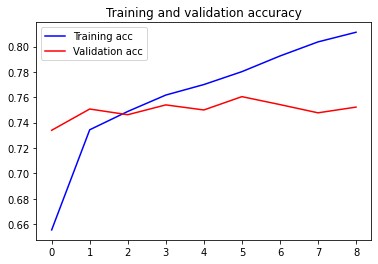

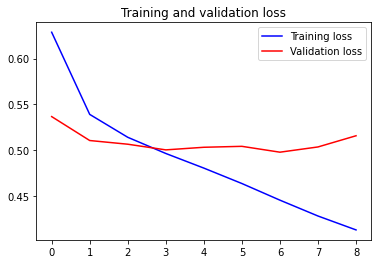

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()


In [ ]:
def decode_sentiment(score, include_neutral=True):
    if include_neutral:        
        label = "NEUTRAL"
        SENTIMENT_THRESHOLDS= [0.5,1.5]
        if score <= SENTIMENT_THRESHOLDS[0]:
            label = NEGATIVE
        elif score >= SENTIMENT_THRESHOLDS[1]:
            label = POSITIVE

        return label
    else:
        return NEGATIVE if score < 0.5 else POSITIVE

In [ ]:
def predict(text, include_neutral=True):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}  

In [ ]:
predict("I love the music")

{'elapsed_time': 0.4479188919067383,
 'label': 'NEUTRAL',
 'score': 0.9494983553886414}

### With trainable embedding layer

In [ ]:
embedding_layer2 = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=True)

In [ ]:
model2 = Sequential()
model2.add(embedding_layer2)
model2.add(Dropout(0.5))
model2.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 140, 300)          9848400   
_________________________________________________________________
dropout_32 (Dropout)         (None, 140, 300)          0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 100)               160400    
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 101       
Total params: 10,008,901
Trainable params: 10,008,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [ ]:
%%time
history = model2.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/8
36/36 [==============================] - 37s 1s/step - loss: 0.5956 - accuracy: 0.6737 - val_loss: 0.5256 - val_accuracy: 0.7368
Epoch 2/8
36/36 [==============================] - 36s 989ms/step - loss: 0.5356 - accuracy: 0.7294 - val_loss: 0.5122 - val_accuracy: 0.7445
Epoch 3/8
36/36 [==============================] - 37s 1s/step - loss: 0.5063 - accuracy: 0.7527 - val_loss: 0.4983 - val_accuracy: 0.7527
Epoch 4/8
36/36 [==============================] - 36s 1s/step - loss: 0.4831 - accuracy: 0.7675 - val_loss: 0.4898 - val_accuracy: 0.7613
Epoch 5/8
36/36 [==============================] - 36s 1s/step - loss: 0.4541 - accuracy: 0.7871 - val_loss: 0.4865 - val_accuracy: 0.7645
Epoch 6/8
36/36 [==============================] - 36s 997ms/step - loss: 0.4272 - accuracy: 0.8053 - val_loss: 0.4836 - val_accuracy: 0.7713
Epoch 7/8
36/36 [==============================] - 36s 988ms/step - loss: 0.3985 - accuracy: 0.8207 - val_loss: 0.4904 - val_accuracy: 0.7732
Epoch 8/8
36/36 [=

In [ ]:
model2.save("baseword2vec_embedding_learnable")

INFO:tensorflow:Assets written to: baseword2vec_embedding_learnable/assets


In [ ]:
%time
score = model2.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 11 µs
10/10 [==============================] - 1s 149ms/step - loss: 0.5334 - accuracy: 0.7684

ACCURACY: 0.7684000134468079
LOSS: 0.5333507061004639


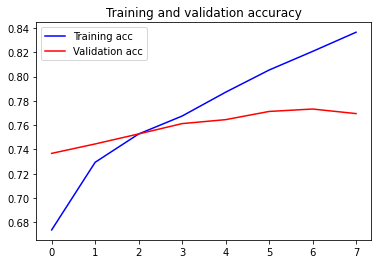

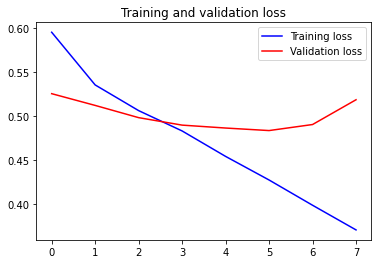

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()


In [ ]:
def decode_sentiment(score, include_neutral=True):
    if include_neutral:        
        label = "NEUTRAL"
        SENTIMENT_THRESHOLDS= [0.5,1.5]
        if score <= SENTIMENT_THRESHOLDS[0]:
            label = NEGATIVE
        elif score >= SENTIMENT_THRESHOLDS[1]:
            label = POSITIVE

        return label
    else:
        return NEGATIVE if score < 0.5 else POSITIVE

In [ ]:
def predict(text, include_neutral=True):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model2.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}  

In [ ]:
predict("I love the music")

{'elapsed_time': 0.3338913917541504,
 'label': 'NEUTRAL',
 'score': 0.9953941106796265}